# Advanced data visualization using Pandas


## Resources

* [10 minutes to Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Learn Pandas](https://bitbucket.org/hrojas/learn-pandas)
* http://pandas.pydata.org/pandas-docs/stable/visualization.html



# Tutorial

In this Pandas tutorial you will use Pandas to explore ChIP-seq and DNaseI-seq datasets for 3 different celltypes from the [Roadmap Epigenomics](http://www.roadmapepigenomics.org/) data:

* E081: Fetal Brain Male
* E082: Fetal Brain Female
* E083: Fetal Heart

Make sure you have downloaded the data from the repository at http://github.com/simonvh/devcomvis.

Before we start, import the appropriate modules.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Some other essential and useful configuration:

In [2]:
# Enable showing of figures in the notebook
%matplotlib inline

# Make the figure size in Jupyter a little bigger
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 100

# Important: update this variable!

Change the path below to the path on your local filesystem where you extracted the zip file. 
This should be the directory where the `*.bed.gz` files are located.
While pandas can read directly from a URL, it might become very slow if we all do that.

In [3]:
data_path = "https://github.com/simonvh/devcomvis/raw/master/data/"

# H3K4me1 and H3K4me3 marking in promoters and enhancers in Fetal Brain

We can import the data for E082 (female fetal brain) into pandas DataFrames, using the `read_table` function.
Note that pandas can read gzipped files.

In [4]:
# read the data
prom_E082_K4me1 = pd.read_table(os.path.join(data_path, "promoters_E082-H3K4me1.counts.bed.gz"),
                                compression='gzip',
                                names=['chr', 'start', 'end', 'reads'])
enh_E082_K4me1 = pd.read_table(os.path.join(data_path, "enhancers_E082-H3K4me1.counts.bed.gz"),
                                compression='gzip',
                                names=['chr', 'start', 'end', 'reads'])
prom_E082_K4me3 = pd.read_table(os.path.join(data_path, "promoters_E082-H3K4me3.counts.bed.gz"),
                                compression='gzip',
                                names=['chr', 'start', 'end', 'reads'])
enh_E082_K4me3 = pd.read_table(os.path.join(data_path, "enhancers_E082-H3K4me3.counts.bed.gz"),
                               compression='gzip',
                               names=['chr', 'start', 'end', 'reads'])

In [5]:
# This is how it looks
prom_E082_K4me1.head()

,chr,start,end,reads
0,chr1,66999324,67000324,24
1,chr1,16766666,16767666,23
2,chr1,25071259,25072259,14
3,chr1,16766666,16767666,23
4,chr1,33546213,33547213,32


In [6]:
# Add annotation as extra columns
prom_E082_K4me1['element'] = 'promoter'
prom_E082_K4me1['mark'] = 'H3K4me1'

prom_E082_K4me1.head()

,chr,start,end,reads,element,mark
0,chr1,66999324,67000324,24,promoter,H3K4me1
1,chr1,16766666,16767666,23,promoter,H3K4me1
2,chr1,25071259,25072259,14,promoter,H3K4me1
3,chr1,16766666,16767666,23,promoter,H3K4me1
4,chr1,33546213,33547213,32,promoter,H3K4me1


In [7]:
# Also annotate the other three data frames
enh_E082_K4me1['element'] = 'enhancer'
prom_E082_K4me3['element'] = 'promoter'
enh_E082_K4me3['element'] = 'enhancer'

enh_E082_K4me1['mark'] = 'H3K4me1'
prom_E082_K4me3['mark'] = 'H3K4me3'
enh_E082_K4me3['mark'] = 'H3K4me3'

In [8]:
# Create one big DataFrame using the concat() method
df_brain_female = pd.concat([prom_E082_K4me1, enh_E082_K4me1, prom_E082_K4me3, enh_E082_K4me3])

# Show number of rows and columns
print df_brain_female.shape

(1172150, 6)


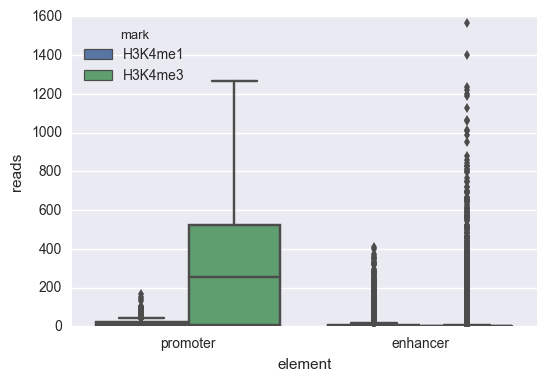

In [9]:
# Now we can easily make a boxplot of H3K4me1, H3K4me3 in promoters and enhancers
sns.boxplot(x="element", y="reads", hue="mark", data=df_brain_female)

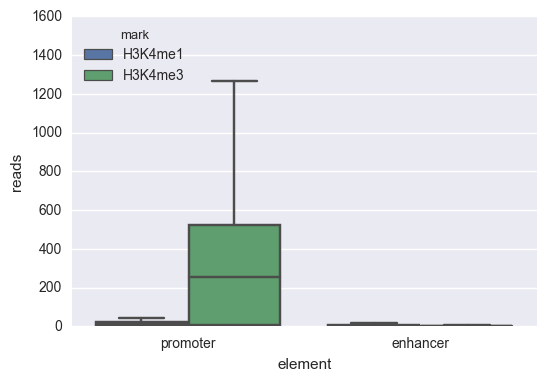

In [10]:
# better to not plot the outliers (single dots stacked on top of each box/whisker)
sns.boxplot(x="element", y="reads", hue="mark", fliersize=0, data=df_brain_female)

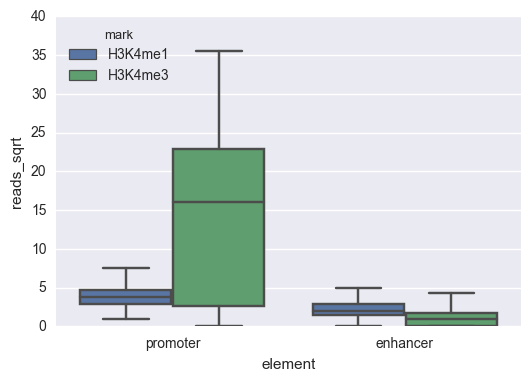

In [11]:
# if you do a data transformation, the plot may look better
# for readcounts (integers ranging from 0 up to ...) a squareroot transformation can work
# since it handles zeros well (log-transformations does not)
df_brain_female['reads_sqrt'] = np.sqrt(df_brain_female['reads'])

sns.boxplot(x="element", y="reads_sqrt", hue="mark", fliersize=0, data=df_brain_female)

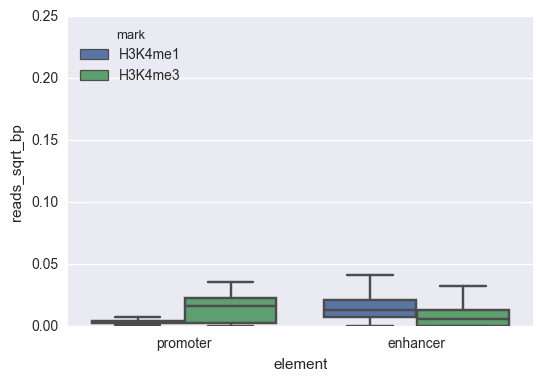

In [12]:
# correct the transformed readcounts for the length of the regions
df_brain_female['reads_sqrt_bp'] = df_brain_female['reads_sqrt'] / (df_brain_female['end'] - df_brain_female['start'])

sns.boxplot(x="element", y="reads_sqrt_bp", hue="mark", fliersize=0, data=df_brain_female)

(0, 0.06)

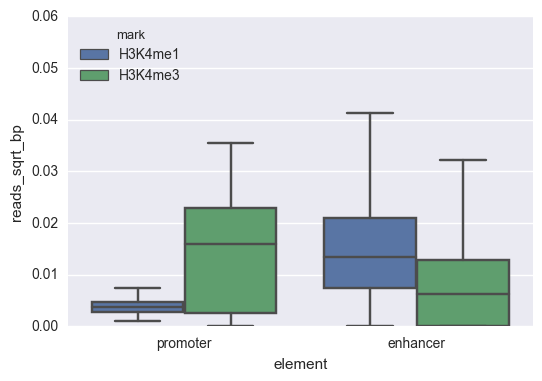

In [13]:
# adapt the y-axis scale
sns.boxplot(x="element", y="reads_sqrt_bp", hue="mark", fliersize=0, data=df_brain_female)
plt.ylim(0,0.06)

**Exercise**: Now plot it in a different way. 
Instead of grouping the boxplots by regulatory element, group them by the mark.

In [14]:
# plot grouped by histone modification

**Excercise**: Now make a similar plot using log2-transformed read counts. 
What is a simple and straightforward way to deal with the read counts of zero in the dataset?



In [15]:
# plot with log2-transformed counts

## Questions

* Based on these boxplots, what can you conclude about the histone modifications H3K4me1 and H3K4me3? 
  (if you are familiar with these histone modifications, does the data here support what you know?)

# H3K4me1 and H3K4me3: fetal brain-specific enhancers only

In the previous section we used all enhancers that were called in fetal brain (male and female) and fetal heart, 
but maybe we should include only those enhancers that were really called as an enhancer in E082 (fetal brain female)

This information is in the file `regions_enh_E081_E082_E083.bed.gz`, which you find in the `/data/` directory.

**Note:** This file has the same number of rows and the same order as all files above that are called `enhancers_*.bed.gz`

Read the file into a pandas DataFrame

In [16]:
# Let us look at the enhancers only, and select only those that were called as an enhancer in E082
enh = pd.read_table(os.path.join(data_path, "regions_enh_E081_E082_E083.bed.gz"),
                    compression="gzip",
                    names=['chr', 'start', 'end', 'celltype'])

**Excercise**: Do a head to see what the file looks like.

In [17]:
# inspect the data

To select all the regions that are called as enhancer in E082, 
we will create a boolean index that consists of 'True' / 'False',
indicating which line (=region, =enhancer) in the `enh` DataFrame refers to an enhancer in E082
Remember that the order of the `enh` DataFrame was the same as for all enhancer DataFrames.
Here we will use a Pandas string function called `contains()`. 
For other functions see here: http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling.

**Exercise**: See what the new `cond` DataFrame looks like with a `head()`.

In [18]:
# create the index filter
cond = enh['celltype'].str.contains('E082')

Now we take the individual enhancer DataFrames for E082 (not the concatenated one) and select from those only the E082-specific enhancer regions

In [19]:
enh_E082_K4me1_spec = enh_E082_K4me1[cond]
enh_E082_K4me3_spec = enh_E082_K4me3[cond]

In [20]:
# concatenate the DataFrames
df_E082_spec = pd.concat([prom_E082_K4me1, enh_E082_K4me1_spec, prom_E082_K4me3, enh_E082_K4me3_spec])

In [21]:
# sqrt transformation and length-correction
df_E082_spec['reads_sqrt'] = np.sqrt(df_E082_spec['reads'])
df_E082_spec['reads_sqrt_bp'] = df_E082_spec['reads_sqrt'] / (df_E082_spec['end'] - df_E082_spec['start'])

(0, 0.06)

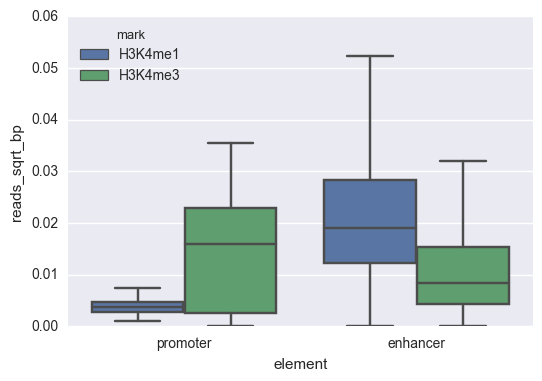

In [22]:
# boxplot
sns.boxplot(x="element", y="reads_sqrt_bp", hue="mark", fliersize=0, data=df_E082_spec)
plt.ylim(0,0.06)

# Enhancer marking in different cell types

In [23]:
# now let us look at H3K4me1 data only, in enhancers only
# we will add data from a different cell type, E081 (), and E083 ()
E081_enh_K4me1 = pd.read_table(os.path.join(data_path,"enhancers_E081-H3K4me1.counts.bed.gz"),
                               compression="gzip",
                               names=['chr', 'start', 'end', 'reads'])
E082_enh_K4me1 = pd.read_table(os.path.join(data_path, "enhancers_E082-H3K4me1.counts.bed.gz"),
                               compression="gzip",
                               names=['chr', 'start', 'end', 'reads'])
E083_enh_K4me1 = pd.read_table(os.path.join(data_path, "enhancers_E083-H3K4me1.counts.bed.gz"),
                               compression="gzip",
                               names=['chr', 'start', 'end', 'reads'])

In [24]:
# annotate from which celltype the data comes
E081_enh_K4me1['celltype'] = "E081"
E082_enh_K4me1['celltype'] = "E082"
E083_enh_K4me1['celltype'] = "E083"

In [25]:
# annotate the enhancers that were called for each cell type
E081_enh_K4me1['enh'] = enh['celltype']
E082_enh_K4me1['enh'] = enh['celltype']
E083_enh_K4me1['enh'] = enh['celltype']

In [26]:
# make a merged DataFrame using 'concat'
m = pd.concat([E081_enh_K4me1, E082_enh_K4me1, E083_enh_K4me1])

In [27]:
# convert readcounts to sqrt
m['reads_sqrt'] = np.sqrt(m['reads'])

In [28]:
# correct for region length
m['reads_sqrt_bp'] = m['reads_sqrt']/(m['end']-m['start'])

(0, 0.07)

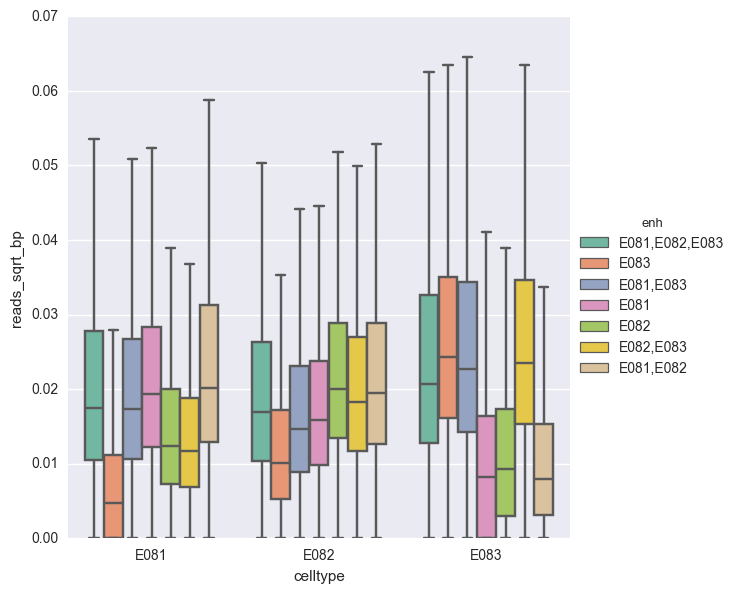

In [29]:
# make the boxplot
# this uses a very powerful seaborn function: factorplot()
sns.factorplot(x="celltype", y="reads_sqrt_bp", hue="enh", data=m, 
               size=6, kind="box", palette="Set2", fliersize=0)
plt.ylim(0,0.07)

# Promoter marking vs. gene expression

In [30]:
# You are going to plot the gene expression (RPKM) as a function of the active promoter mark H3K4me3 at the corresponding genes, for E082.
# For this you need the file "hg19_RefSeq_TSS500_ENSEMBL_RPKM"
# This file has the same ordering as all files named "hg19_RefSeq_TSS500__blabla"

rpkm = pd.read_table(os.path.join(data_path, "promoters_ENSEMBL_RPKM.txt.gz"),
                     compression="gzip")

In [31]:
# The DataFrame 'rpkm' has many columns, you need to paste the column called 'E082' to a DataFrame called 'E082_enh_K4me3'

E082_prom_K4me3 = pd.read_table(os.path.join(data_path, "promoters_E082-H3K4me3.counts.bed.gz"),
                                compression='gzip',
                                names=['chr', 'start', 'end', 'reads'])

In [32]:
# Do the sqrt transformation
E082_prom_K4me3['reads_sqrt'] = np.sqrt(E082_prom_K4me3['reads'])

In [33]:
# Note that there is no need to normalize for region length since all promoters here have the same length

In [34]:
# paste the RPKM column 'E082' from the 'rpkm' DataFrame into the 'E082_prom_K4me3' DataFrame
E082_prom_K4me3['rpkm'] = rpkm['E082']

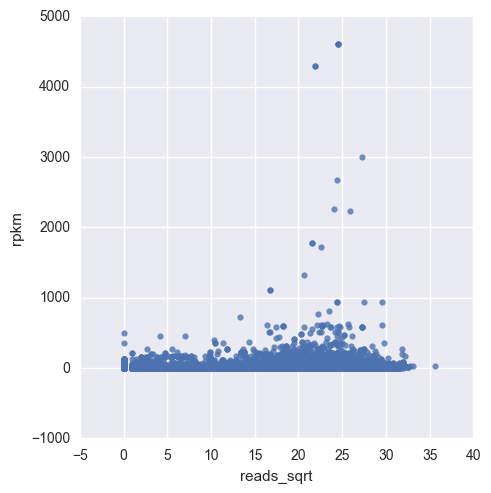

In [35]:
# plot as a scatterplot
sns.lmplot(x='reads_sqrt', y='rpkm', data=E082_prom_K4me3, fit_reg=False)

In [36]:
# Note that 'lmplot' tries to fit and plot a regression line, which you can turn off by 'fit_reg=False'

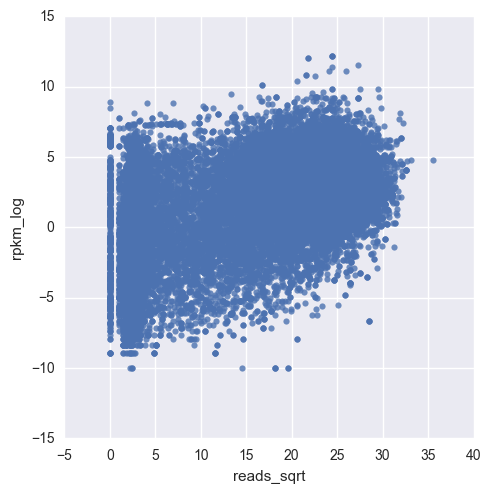

In [37]:
# this does not look fantastic....
# For gene expression it is usually good to plot it in log-scale
E082_prom_K4me3['rpkm_log'] = np.log2(E082_prom_K4me3['rpkm'])
sns.lmplot(x='reads_sqrt', y='rpkm_log', data=E082_prom_K4me3, fit_reg=False)

In [38]:
# This looks much better
# Although the relationship is not strict, there is a clear trend of higher H3K4me3 at highly expressed genes

In [39]:
# Just for fun, you can check whether the trend has some biological meaning, by plotting the gene expression from **E082** as a function of H3K4me3 in **E083**
# The expectation is that the trend you observed above is less clear here

E083_prom_K4me3 = pd.read_table(os.path.join(data_path, "promoters_E083-H3K4me3.counts.bed.gz"),
                                compression="gzip",
                                names=['chr', 'start', 'end', 'reads'])

In [40]:
# sqrt transformation and RPKM logging
E083_prom_K4me3['reads_sqrt'] = np.sqrt(E083_prom_K4me3['reads'])
E083_prom_K4me3['rpkm'] = rpkm['E082']
E083_prom_K4me3['rpkm_log'] = np.log2(E083_prom_K4me3['rpkm'])

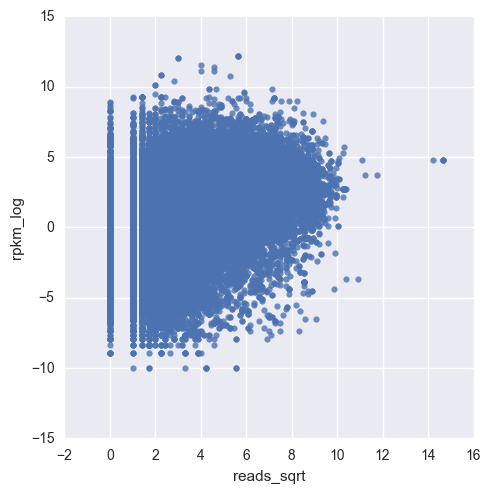

In [41]:
# boxplot
sns.lmplot(x='reads_sqrt', y='rpkm_log', data=E083_prom_K4me3, fit_reg=False)

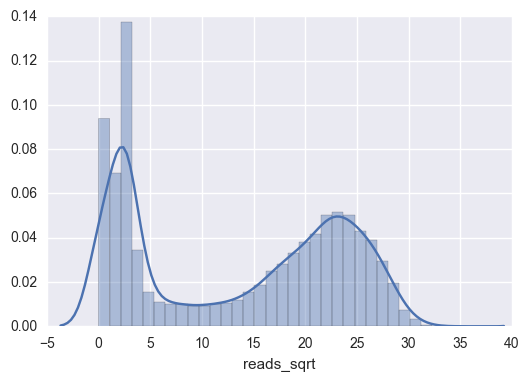

In [42]:
# Alternatively to a scatterplot, you can assign H3K4me3 levels to 'hihg' or 'low'
# But, what is 'high' and what is 'low'?
# To get an idea, you can plot the distribution of H3K4me3 using a histogram/densityplot
sns.distplot(E082_prom_K4me3['reads_sqrt'])

In [43]:
# Clearly, there the 'high' regions have signals that are higher than 15 or so
# Assign 'high' and 'low' to H3K4me3 levels
E082_prom_K4me3['reads_sqrt_bin'] = np.where(E082_prom_K4me3['reads_sqrt'] > 15, "high K4me3", "low K4me3")

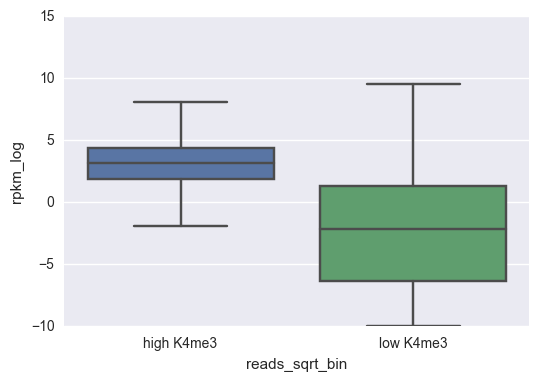

In [44]:
# Boxplot RPKM (log) as a function of 'high' and 'low' H3K4me3
sns.boxplot(x="reads_sqrt_bin", y="rpkm_log", fliersize=0, data=E082_prom_K4me3)

In [45]:
# You can also specifify more than 2 bins, from the data itself, using 'cut'
E082_prom_K4me3['reads_sqrt_bin'] = pd.cut(E082_prom_K4me3['reads_sqrt'], 3, labels=False)
# Note that 'labels=False' causes the bins to be numbered

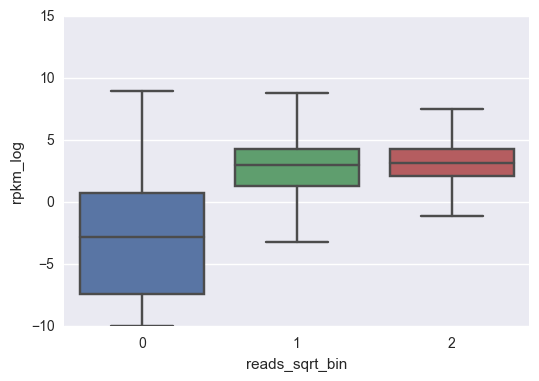

In [46]:
# Boxplot Boxplot RPKM (log) as a function of multiple H3K4me3 bins
sns.boxplot(x="reads_sqrt_bin", y="rpkm_log", fliersize=0, data=E082_prom_K4me3)